# Logistic Regression

The goal of this nb is to get familiar with the following parts of ML:
- scikit-learn: How to use a logistic regression classification model
- Visualizing logisitc regression classifier predictions
- Learning about measures of performance for classification


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline


# The data
We have historical data of 40 candidates that applied for a job at a company.   
For each candidate we have their secondary education score as well as there work experience in years and if they were accepted or not.   
We want to build a logistic regression model to predict whether we should admitt a new candidate or not.   

In [9]:

candidates = {'sec': [5.8, 7.5, 6.9, 7.1, 6.8, 7.3, 6.9, 7.2, 7.4, 6.9, 6.1, 6.9, 7.1, 6.8, 7.7, 6.1, 5.8, 6.5, 5.4, 5.90, 6.21, 6.00, 5.59, 5.51, 5.75, 6.78, 6.67, 5.80, 6.50, 6.69, 6.43, 6.21, 6.66, 6.63, 6.81, 6.51, 6.77, 5.80, 5.90, 6.90],
              'workexp': [3.5, 4.2, 3.7, 5, 4, 6, 1, 4.3, 5, 1, 3.4, 5, 6, 4, 3, 1.6, 4, 6, 2.7, 3, 2.3, 1, 4, 1, 2, 6.5, 4, 2, 6, 5.7, 1, 2, 4, 6, 5, 1.5, 2, 1, 4, 5.5],
              'accepted': [1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1]
              }
feature_names = ['sec', 'workexp']

# Create a dataframe from the dictionary
df = pd.DataFrame(candidates)

df.describe()


,sec,workexp,accepted
count,40.000000,40.000000,40.000000
mean,6.505500,3.572500,0.475000
std,0.586987,1.735746,0.505736
min,5.400000,1.000000,0.000000
25%,5.975000,2.000000,0.000000
50%,6.645000,4.000000,0.000000
75%,6.900000,5.000000,1.000000
max,7.700000,6.500000,1.000000


In [3]:
df.head(10)

,sec,workexp,accepted
0,5.8,3.5,1
1,7.5,4.2,1
2,6.9,3.7,0
3,7.1,5.0,1
4,6.8,4.0,0
5,7.3,6.0,1
6,6.9,1.0,0
7,7.2,4.3,1
8,7.4,5.0,1
9,6.9,1.0,0


Text(37.597222222222214, 0.5, 'accepted')

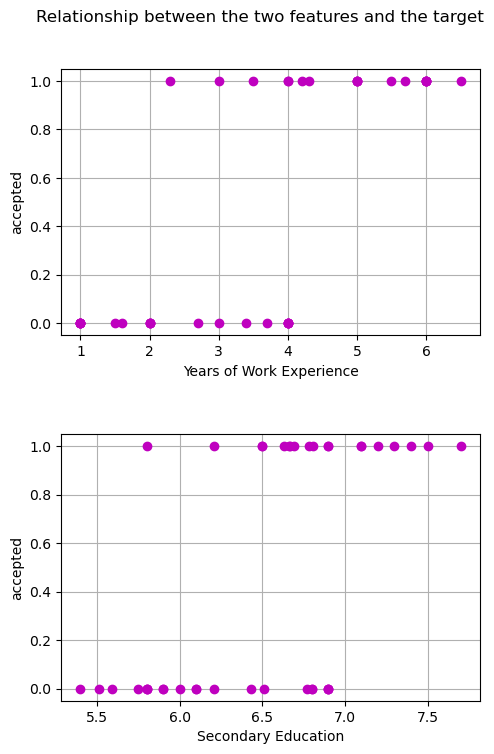

In [10]:
# let's plot two features to see if we can see a pattern
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(6,8))
fig.tight_layout(pad=5.0)
fig.suptitle('Relationship between the two features and the target')

ax1.plot(df['workexp'], df['accepted'], 'om')
ax1.grid()
ax1.set_xlabel('Years of Work Experience')
ax1.set_ylabel('accepted')

ax2.plot(df['sec'], df['accepted'], 'om')
ax2.grid()
ax2.set_xlabel('Secondary Education')
ax2.set_ylabel('accepted')

Text(0.5, 1.0, 'Scatter plot of the two features')

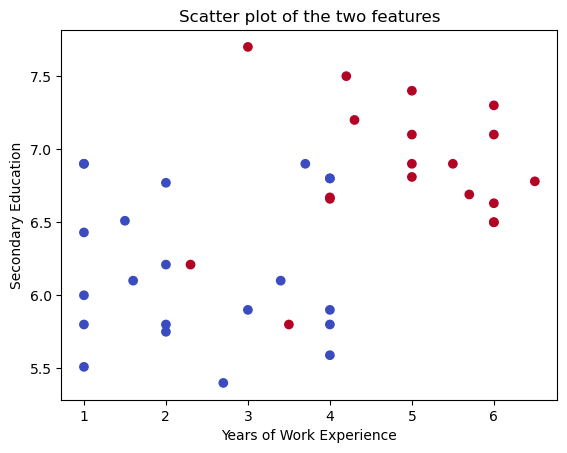

In [11]:

# we can also use a scatter plot to see the relationship between the two features
plt.scatter(df['workexp'], df['sec'], c=df['accepted'], cmap=cm.coolwarm)
plt.xlabel('Years of Work Experience')
plt.ylabel('Secondary Education')
plt.title('Scatter plot of the two features')


c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.05, 'Pairplot of the features')

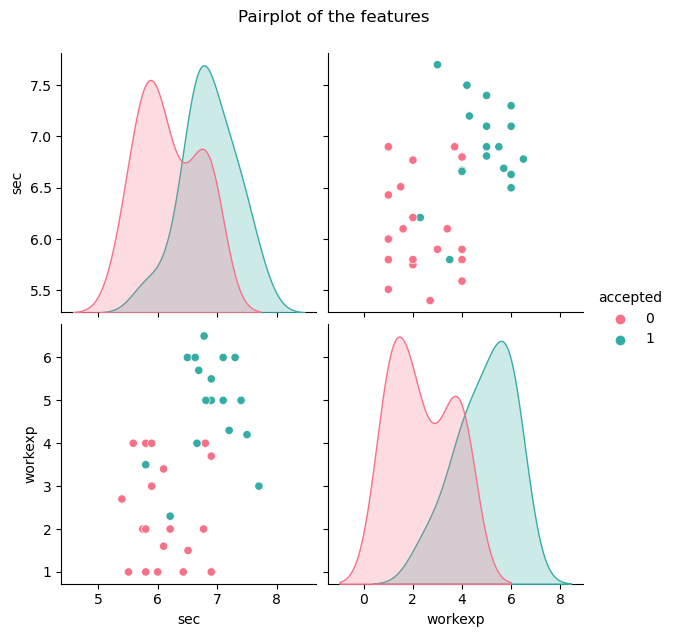

In [12]:
# for data that's in a pandas dataframe, seaborn is a great tool for plotting
# https://seaborn.pydata.org/tutorial/function_overview.html

sns.pairplot(df, hue='accepted', size=3, diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of the features', y=1.05)


# Question?
What is special about the target variable `'accepted'` compared to what we used in linear regression? 

### Answer / Comment:
The data is categorical, more precisely, each sample either belongs to the class 'accepted' (represented with the value y=1) or 'not accepted' (y=0). The numerical value of y does not have a meaning. It is just a label for the class. We could just as well use y= -25 vs. y= +54321 to distinguish the two classes. This is yet another reason why linear regression does not work. 

# The model: Sigmoid function
As you saw in class we use 
$p_i = \large\frac {1}{1 + e^{-(ax_i + b)}} $

How does the sigmoid function look like?

Text(0.5, 1.0, 'Sigmoid function')

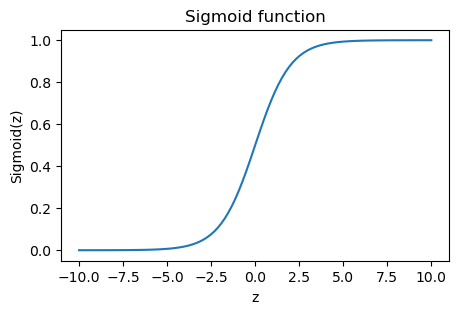

In [13]:

x = np.linspace(-10, 10, 100) # create 100 points between -10 and 10
z = 1/(1 + np.exp(-x)) # sigmoid function

plt.figure(figsize=(5,3)) 
plt.plot(x, z)
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.title('Sigmoid function')

### Comment on the sigmoid model
It is worth to carefully inspect the sigmoid model. You should notice that the sigmoid function itself has a **single** input value, here denoted z. The sigmoid function is **not** parametrized:

$S(z) = p_i = \large\frac {1}{1 + e^{-z}} $  
where 
$z = ax_i + b$  
  
    
z itself is calculated from the input data. From each data $x_i$ an intermediate quantity z is calculated. 
What is actually learned from the data, are the weights (here denoted $a$ and $b$, but more often you see $w$ or even $\theta$). 
In other words: our model has two components:  
  1. z is a linear combination of the input features x. If we have only one feature (e.g. 'workexp' as in the first exercise below), then z is simply $ax_i + b$. In general, we have data with D dimensions. Then, for each D-dimensional data point $x_i$ we calculate the linear combination  $z_i=\sum_{d=0}^{d=D}w_d \cdot x_i^d$
  2. The sigmoid function is then applied on $z_i$ to calculate the probability $Pr(x_i  \textrm{ belongs to class 1})$.

In the plots below, we do not visualize z. Instead, we always plot the output against one of the input features (e.g 'workexp'). Make sure you understand this difference and and make sure you always know what you look at.


# Is this cost function convex?
$$
\begin{align}
p_i &= \frac {1}{1 + e^{-(ax_i + b)}} \\  
E &= -\frac{1} {N}\sum_{i=1}^N   (y_i log (p_i)) + ((1- y_i) log (1 - p_i))
\end{align}
$$
We can plot the logit error on out data as a function of the parameters a and b.   
We will use a 3D plot as we have two parameters as input and the resulting logit error as output


In [15]:
# define helper functions to visualize the error surface
# you don't need to understand this functions just take a look at the output

sigmoid_model = lambda x, a, b : 1/ (1+ np.exp(-(a*x+b)))
linear_model = lambda x, a, b : a*x+b

def logit_err(X, Y, a, b):
    N = len(X)
    Y_hat = sigmoid_model(X, a, b)
    err1 = Y * np.log(Y_hat)
    err2 = (np.subtract(1, Y)) * np.log(np.subtract(1, Y_hat))
    err = err1 + err2
    sum_of_errors = np.sum(err)
    return -sum_of_errors/(N)
    

def plot_error3D(X, Y,
               a_min = -5, a_max=5, 
               b_min=-5, b_max = 5, nr_mesh_points_ab=100,
               fig = None, ax1 = None, ax2 = None):
    # define the region of interest. 
    A = np.linspace(a_min, a_max, nr_mesh_points_ab)
    B = np.linspace(b_min, b_max, nr_mesh_points_ab)
    aa, bb = np.meshgrid(A, B)
    
    # we wrap the (four-param) error function into a two-parameter expression and inject the Data.
    # A vectorized form of this expression can then be called directly with the meshgrid coordinates aa, bb
    vect_err=np.vectorize(lambda a, b: logit_err(X, Y, a,b))
    E = vect_err(aa, bb)

    if fig is None:
        fig = plt.figure(figsize= (10,10))
    if ax1 is None:
        ax1 = fig.add_subplot(221, projection='3d')
    if ax2 is None:
        ax2 = fig.add_subplot(222)

    fig.suptitle(f"Logit Error as a function of a and b")

    ax1.plot_surface(aa, bb, E, rstride=1, cstride=1, color='y', alpha=0.5)

    ax1.set_xlabel('a')
    ax1.set_ylabel('b')
    ax1.set_zlabel(f'logit_err(X, Y, a, b)')
    ax1.set_aspect('auto')

    h = ax2.contourf(A, B, E, levels=20, cmap=cm.coolwarm) # cmap="YlGnBu"
    fig.colorbar(h, location = "bottom", label=f'logit_err(X, Y, a, b)')

    # add contour lines. For better readability, transform values to get equidistant lines.
    mi = np.min(E)
    ma = np.max(E)
    r = ma-mi
    ax2.contour(A, B, np.sqrt((E-mi+1e-6)/r), levels=20, colors = 'k', linewidths = 0.2) # cmap="YlGnBu"

    ax2.set_xlabel('a')
    ax2.set_ylabel('b')
    ax2.set_aspect('equal')

    return fig, ax1, ax2


c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\pandas\core\arraylike.p

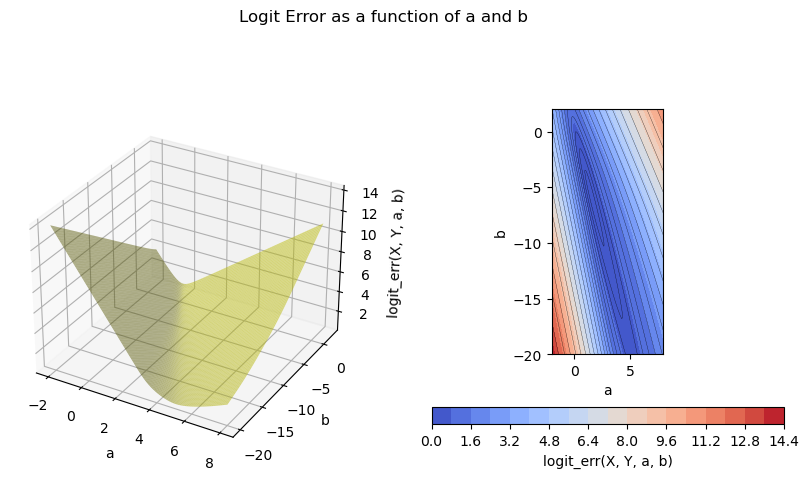

In [16]:
# plot the error function
_ = plot_error3D(X=df['workexp'], Y=df['accepted'], a_min=-2, a_max=8, b_min=-20, b_max=2)

# YES!
As shown in the above plots, the cost function is indeed convex. That's good news, because it tells us that we can use any of the convex optimization methods.

Here, we don't implement the optimizer, but we make use of the sklearn library.

In [17]:

def plot_decision_boundary(X, y, model):
    ''' Helper function to plot the decision boundary of a model with two features'''
    border = 1
    a_min = X[:,0].min() - border
    a_max = X[:,0].max() + border
    b_min = X[:,1].min() - border
    b_max = X[:,1].max() + border

    # create a meshgrid of points in the input space
    # and compute the model's output at these points
    xx, yy = np.mgrid[a_min:a_max:.01, b_min:b_max:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = model.predict_proba(grid)[:, 1].reshape(xx.shape)

    # plot the model's output probability as a contour plot
    fig, ax = plt.subplots(figsize=(8, 6))
    contour = ax.contourf(xx, yy, probs, levels=50, cmap=cm.coolwarm,
                        vmin=0, vmax=1)
    ax_c = fig.colorbar(contour)
    ax_c.set_label('p(item belongs to class \'accepted\')')
    ax_c.set_ticks([0, .25, .5, .75, 1])

    # plot the decision boundary (the line where the model output is 0.5)
    ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.5)

    # plot the data points
    ax.scatter(X[:,0], X[:, 1], c=y, s=50,
            cmap=cm.coolwarm, vmin=-.2, vmax=1.2,
            edgecolor="white", linewidth=1)

    ax.set(xlabel=feature_names[0], ylabel=feature_names[1])
    fig.suptitle('Classification based on two features')


# Logistic Regression
1. Use the LogisticRegression class from sklearn to fit a model to the admission-data.   
Start Using only one feature (Years of Work experience).  
    - Evaluate your model
        - Visually evaluate your model -- Plot the data and the predictions (plot the predicted class)
        - Evaluate the models performance using the *metrics.log_loss()* function.
        
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Note that the LogisticRegression fit method expects the features as a numpy array in the shape of (n_samples, n_features),   
and the targets as a numpy array with shape (n_samples, ).   
so we need to convert the pandas dataframe to a numpy array and then reshape it to the correct shape.
````python
    X_data = df['workexp'].to_numpy().reshape(-1,1)
    y_data = df['accepted'].to_numpy().ravel()
````
Note that after fitting the logistic regression model, we can call `model.predict(X_data)` to get an array of the predictet classes.   
When we want an array with the predicted probabilities of a sample belonging to class 1, we can use  `model.predict_proba(X_data)`


2. Repeat step 1 this time using the other feature (Secondary Education). Which feature explains the target class better? 
3. Repeat, this time using both features. 
    - Visually evaluate your model -- You can use the provided helperfunction `plot_decision_boundary(X, y, model)` to visualize the descision boundary.


In [18]:

from sklearn.linear_model import LogisticRegression
from sklearn import metrics


## 1.1 Simple Logistic Regression

sec - Logit error: 0.515
workexp - Logit error: 0.349


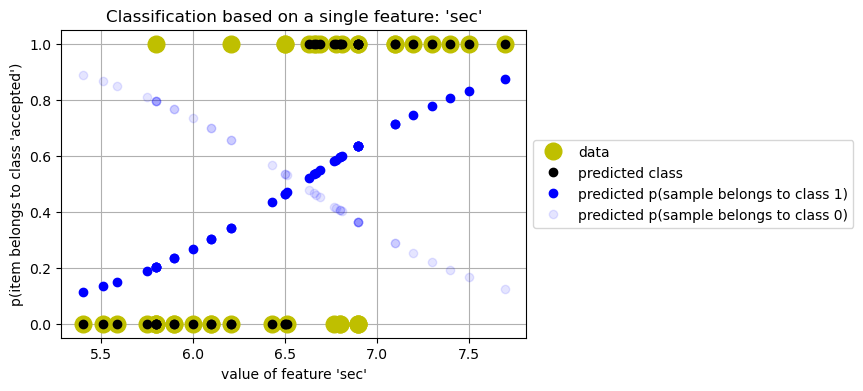

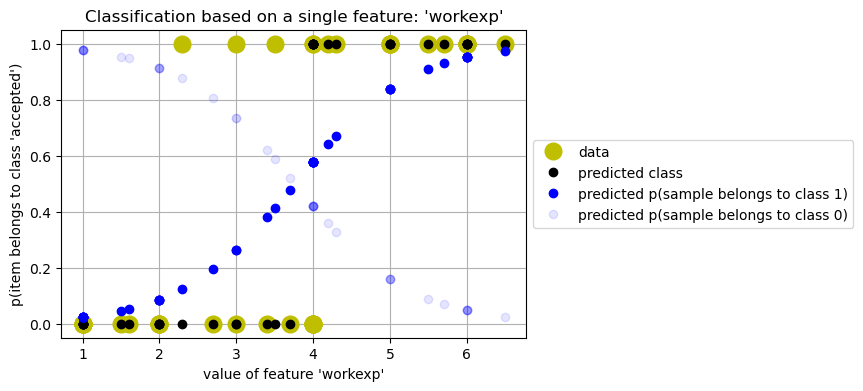

In [20]:

# Logistic Regression with only one feature:

# instanciate a LogisticRegression object
log_reg_1D = LogisticRegression()

# fit the model on both features separately
for feature_name in feature_names:

    # bring the data into the format required by the fit method.
    X_data = df[feature_name].to_numpy().reshape(-1,1)
    y_data = df['accepted'].to_numpy().ravel()

    # the sklearn optimizer fits a model to the data
    log_reg_1D.fit(X_data, y_data)

    # use the fitted model to predict the CLASS (0 or 1).
    y_pred = log_reg_1D.predict(X_data)

    # use the fitted model to predict PROBABILITY that a sample belongs to class 0 or 1.
    y_prob = log_reg_1D.predict_proba(X_data)

    # comupte the logit error
    logistic_loss = metrics.log_loss(y_data, y_prob)
    print(f"{feature_name} - Logit error: {logistic_loss:.3f}")

    # Plottin the results
    plt.figure(figsize=(6,4))
    plt.plot(X_data, y_data, 'oy', markersize=12, label='data')
    plt.plot(X_data, y_pred, 'ok', markersize=6, label = 'predicted class')
    plt.plot(X_data, y_prob[:,1], 'ob', label='predicted p(sample belongs to class 1)')

    # For binary classification, we have Pr(y=1) = 1-Pr(y=0). We can easily visualize this.
    # Actually, sklearn always returns a probability vector where the column index identifies the class:
    plt.plot(X_data, y_prob[:,0], 'ob', alpha=0.1,label='predicted p(sample belongs to class 0)')
    plt.grid()

    plt.xlabel(f'value of feature \'{feature_name}\'')
    plt.ylabel('p(item belongs to class \'accepted\')')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(f'Classification based on a single feature: \'{feature_name}\'')

###

## 1.2 Comparing the performance for different features:
We see that predicting the class based on the work experience results in a logit error of **0.349**
while predicting the class based on the Secondary Education score results in a logit error of **0.515**

This is a clear indication that the **work experience is a better predictor** for the class than the Secondary Education score.

## 1.3 Logistic Regression with multidimensional input

Each data point $x_i$ has two features (=two dimensions): [$x_{1,i}$:'sec', $x_{2,i}$:'workexp'].   
We next train a new model, which uses all these features for classification. The model is:

$
Pr(y_i = 1 | x_i; w) = \Large \frac {1}{1 + e^{-(w_0 + w_1 \cdot x_{1, i} + w_2 \cdot x_{2, i})}} \\  
$

sklearn LogisticRegression automatically calculates the linear combination of all input features. We do not have to specify this model explicitly.



In [21]:
### EXAMPLE SOLUTION
# Logistic Regression with multiple features is referred to as 
# use all input features

# instanciate a LogisticRegression object
log_reg = LogisticRegression()

# bring the data into the format required by the fit method.
X_data = df[feature_names].to_numpy()
y_data = df['accepted'].to_numpy().ravel()

# the sklearn optimizer FITs a model to the data (that's the 'learning' step)
log_reg.fit(X_data, y_data)

# use the fitted model to PREDICT the CLASS (0 or 1).
y_pred = log_reg.predict(X_data)

# use the fitted model to PREDICT PROBABILITY that a sample belongs to class 0 or 1.
y_prob = log_reg.predict_proba(X_data)

# evaluate the models performance
logistic_loss = metrics.log_loss(y_data, y_prob)
print(f"Both features - Logit error: {logistic_loss:.3f}")

###

Both features - Logit error: 0.301


We see the logit error got down to **0.301**. So we can do a better classification, using both features.

## 1.3.1 Visualizing the classification and prediction

Next we visualize the data and predictions. Note that each data point consists of a 2-dimensional feature vector x=['sec', workexp'] and one label (y=0 or y=1). 

In the one-dimensional case, we could directly see the sigmoid function (the probabilities predicted from the 'workexp' feature, lie along the sigmoid function) . Now, if you look at the plots below, we don't see the sigmoid function that clearly. The reason is, that we plot only one input-dimension and collapse the other dimension. 
  
Note that now we can distinguish multiple points that have the same nr of workexp. This is because
we have a 2-dimensional feature vector. Data that has the same 'workexp' (x-axis), but different values 
of 'sec' we get different probabilities.


Text(0.5, 1.0, "Classification view on feature 'workexp'")

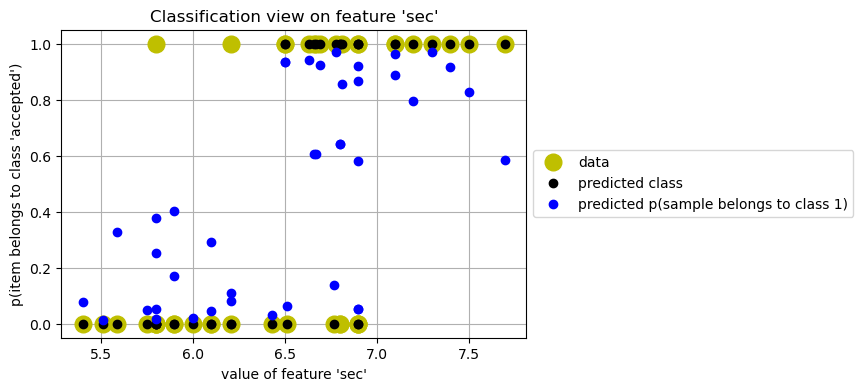

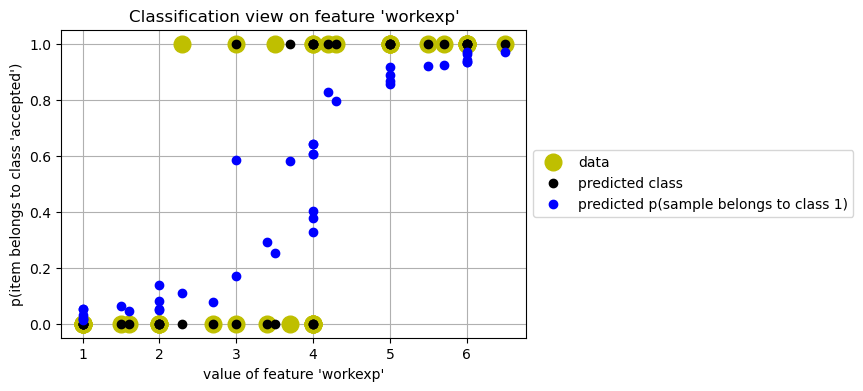

In [22]:
### EXAMPLE SOLUTION

# plot for the feature 'sec'
plt.figure(figsize=(6,4))
plt.plot(X_data[:,0], y_data, 'oy', markersize=12, label='data')
plt.plot(X_data[:,0], y_pred, 'ok', markersize=6, label = 'predicted class')
plt.plot(X_data[:,0], y_prob[:,1], 'ob', label='predicted p(sample belongs to class 1)')
plt.grid()
plt.xlabel('value of feature \'sec\'')
plt.ylabel('p(item belongs to class \'accepted\')')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Classification view on feature \'sec\'')

# plot for the feature 'workexp'
plt.figure(figsize=(6,4))
plt.plot(X_data[:,1], y_data, 'oy', markersize=12, label='data')
plt.plot(X_data[:,1], y_pred, 'ok', markersize=6, label = 'predicted class')
plt.plot(X_data[:,1], y_prob[:,1], 'ob', label='predicted p(sample belongs to class 1)')
plt.grid()
plt.xlabel('value of feature \'workexp\'')
plt.ylabel('p(item belongs to class \'accepted\')')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Classification view on feature \'workexp\'')

###

We can also plot the decision boundary of the classifier in the 2D feature space.   
This is done by plotting the probability for a point belonging to class 1 as a function of the two features.    
        	 
The default decision boundary is the line where the probability is 0.5.   

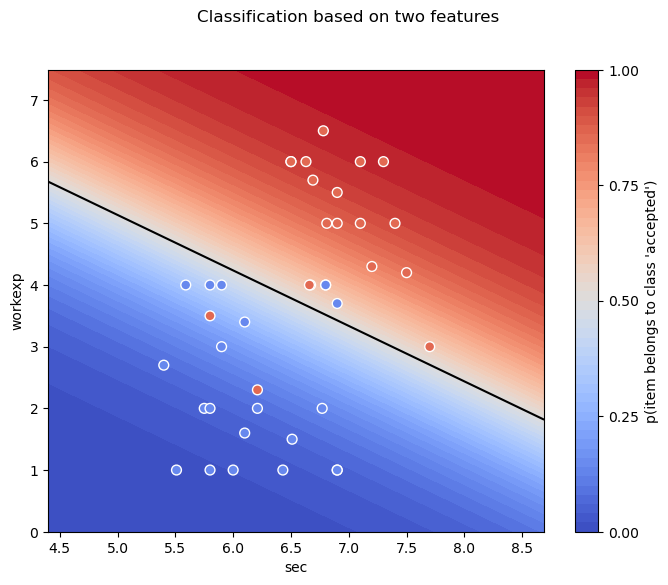

In [23]:

### EXAMPLE SOLUTION

plot_decision_boundary(X_data, y_data, log_reg)

###


Text(0.5, 0.92, '3D view on model output')

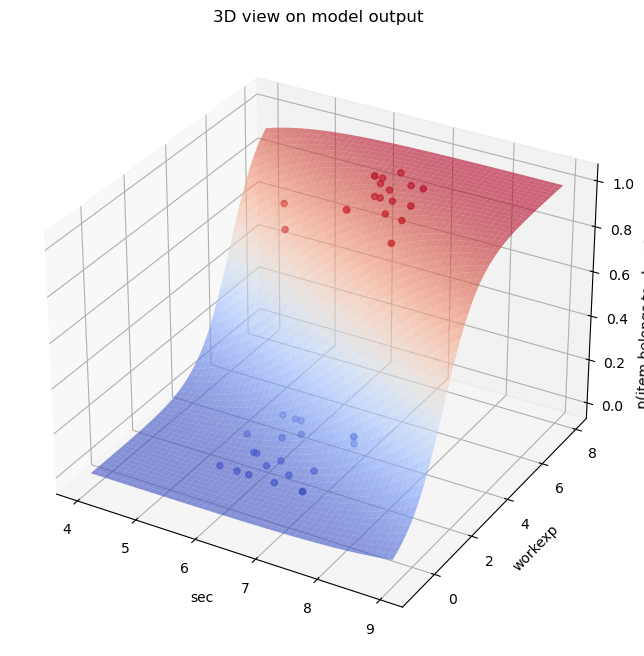

In [24]:
### EXAMPLE SOLUTION

# We can also vizualize the models output in a 3D plot
xx, yy = np.mgrid[4:9:.01, -1:8:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = log_reg.predict_proba(grid)[:, 1].reshape(xx.shape)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# 3d scatter plot of the data
ax.scatter(X_data[:,0], X_data[:,1], y_data, c=y_data, cmap=cm.coolwarm)

ax.plot_surface(xx, yy, probs, cmap=cm.coolwarm, alpha=0.6)

ax.set(xlabel=feature_names[0], ylabel=feature_names[1])
ax.set_zlabel('p(item belongs to class \'accepted\')')
ax.set_title('3D view on model output')

###


# Model Quality

We can calculate different quantities to evaluate the quality of the model (We will study these methods in some details in the next lecture.)


1. How many samples in the (true) class "accepted" are labelled wrong (the model predicted "reject")?  Also called *false negative*
1. How many samples in the (true) class "rejected" are labelled wrong (the model predicted "accepted")?  Also called *false positive*
1. How many samples received the wrong label? | *false positive* + *false negative*



In [25]:
### EXAMPLE SOLUTION

nr_false_reject = np.sum((y_data == 1) & (y_pred == 0))
nr_false_accept = np.sum((y_data == 0) & (y_pred == 1))

print(f'false predictions: {nr_false_reject + nr_false_accept}')
print(f'nr_false_reject: {nr_false_reject}')
print(f'nr_false_accept: {nr_false_accept}')

###

false predictions: 5
nr_false_reject: 2
nr_false_accept: 3


# Threshold

1.  Apply a different classification threshold: Use the function predict_proba(X), then apply a more strict threshold:   
only data with a acceptance probability of $p(accept|data)>0.6$ are accepted.  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba 


2. recalculate the quantities in exercise 2:  
  a. How many samples received the wrong label?  
  b. How many samples in the (true) class "accepted" are labelled wrong (the model predicted "reject")? (False Negative)   
  c. How many samples in the (true) class "rejected" are labelled wrong (the model predicted "accept")? (False Positive)

In [26]:
### EXAMPLE SOLUTION

threshold = 0.6

y_pred = log_reg.predict_proba(X_data)

y_pred = y_prob[:, 1] > threshold
print(y_pred)

# transform True/False to 1/0. 
y_pred = y_pred.astype(int) 
print(y_pred)

###

[False  True False  True  True  True False  True  True False False  True
  True  True False False False  True False False False False False False
 False  True  True False  True  True False False  True  True  True False
 False False False  True]
[0 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 0 0
 0 0 1]


In [28]:
### EXAMPLE SOLUTION


nr_false_reject = np.sum((y_data == 1) & (y_pred == 0))
nr_false_accept = np.sum((y_data == 0) & (y_pred == 1))

print(f'false predictions: {nr_false_reject + nr_false_accept}')
print(f'nr_false_reject: {nr_false_reject}')
print(f'nr_false_accept: {nr_false_accept}')

###


false predictions: 5
nr_false_reject: 3
nr_false_accept: 2


With a 0.5 threshold, we have nr_false_reject = 2, and nr_false_accept = 3  
With a 0.6 threshold, we have nr_false_reject = 3, and nr_false_accept = 2  

The decision is more restrictive, fewer people are accepted. The total number of wrong classifications is the same: 5 (this does not need to be the case in general, just set the threshold to 0.99 to see why). We observe that the number of false 'accepted' is decreasing at the cost of an increased number of false 'recejcts'.

If we increase the threshold even further, the number of wrong classification increases.